In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
df = pd.read_csv('./haberman.csv')

In [4]:
# check for missing values, df types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observations:
- Column names are not proper.
- there are no missing values
- data type of all features is int64.

In [ ]:
# give meaningful names to colums
df.columns = ['age','year','nodes','status']

In [6]:
df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations:
- age range - 30 to 83 yrs, avg age is 52.
- data set collected btw 1958 to 1969.
- about 25% have no nodes detected and 75% have less than or eual to 4 nodes.

In [19]:
print(df['status'].value_counts())
print(df['status'].value_counts(normalize=True))
print(df['year'].value_counts())

status
1    224
2     81
Name: count, dtype: int64
status
1    0.734426
2    0.265574
Name: proportion, dtype: float64
year
58    36
63    30
64    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64


### Observations
- more ppl have status 1 (survived more than five yrs), hence dataset imbalance.
- 73.44% patients survived.
- no. of operations peformed decreased over the years.


### Univariate Analysis
- PDF

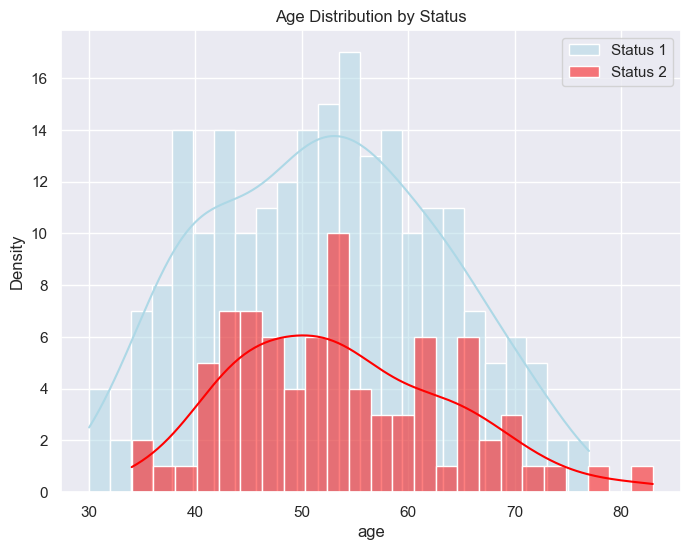

In [78]:
def plotPDF(column, binwidth = 2):
    plt.figure(figsize=(8, 6))

    # Histogram with KDE for Status 1
    sns.histplot(
        data=df[df['status'] == 1], 
        x=column, 
        color="lightblue", 
        bins=15, 
        binwidth=binwidth,
        kde=True, 
        label="Status 1", 
        alpha=0.5, 
        common_norm=False,  # Prevent normalization across the whole dataset
    )

    # Histogram with KDE for Status 2
    sns.histplot(
        data=df[df['status'] == 2], 
        x=column, 
        color="red", 
        bins=15, 
        kde=True, 
        binwidth=binwidth,
        label="Status 2", 
        alpha=0.5, 
        common_norm=False,  # Prevent normalization across the whole dataset
    )

    plt.title(f"{column.capitalize()} Distribution by Status")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plotPDF('age')

### Observations:
- Patients of age more than 75 died in 5 years.
- Patients of age 30-34 survived.
- age 35-40 -> more survived.

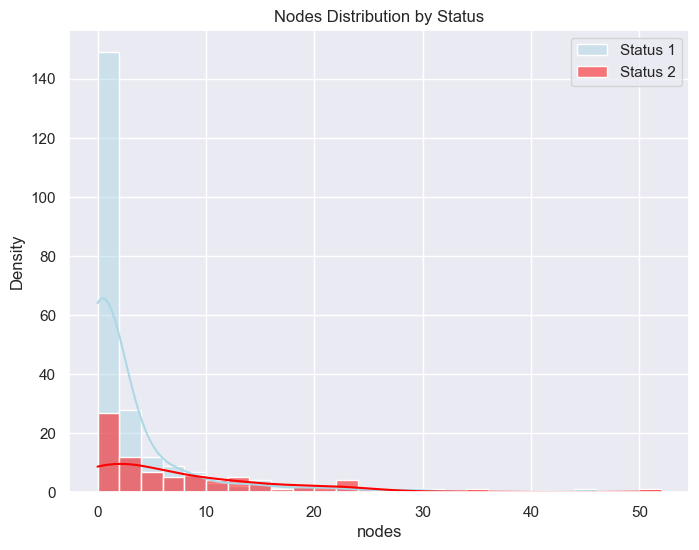

In [75]:
plotPDF('nodes')

### Observations:
- better survival rate of patients having 0-2 nodes.

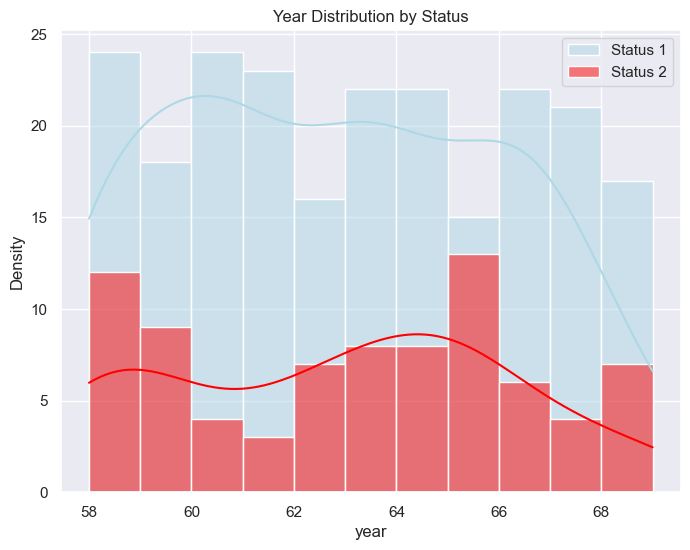

In [79]:
plotPDF('year', 1)

### Observations:
- patients survuved diring yr 60-32 are more than one who died.

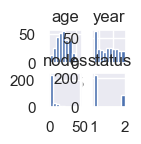

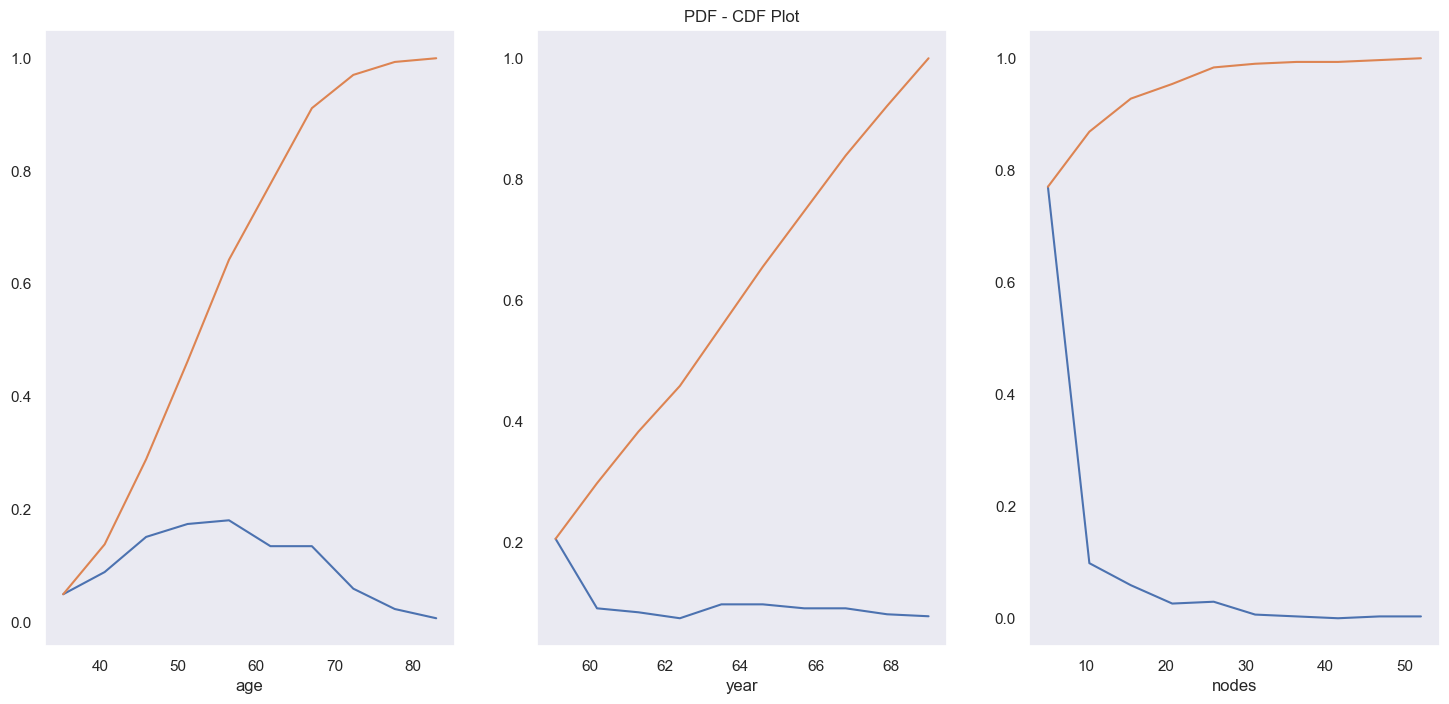

In [ ]:
plt.close()
df.hist()
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 2)
plt.title("PDF - CDF Plot")

for index, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, index+1)
    counts, bin_edges = np.histogram(df[feature], bins = 10, density = True)
    pdf = counts / sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(feature)
    plt.grid()

plt.show()

### Observations:
- about 80% of patients have less than 10 nodes and about 98% of patients have less than 30 nodes.

### Box-Plots :

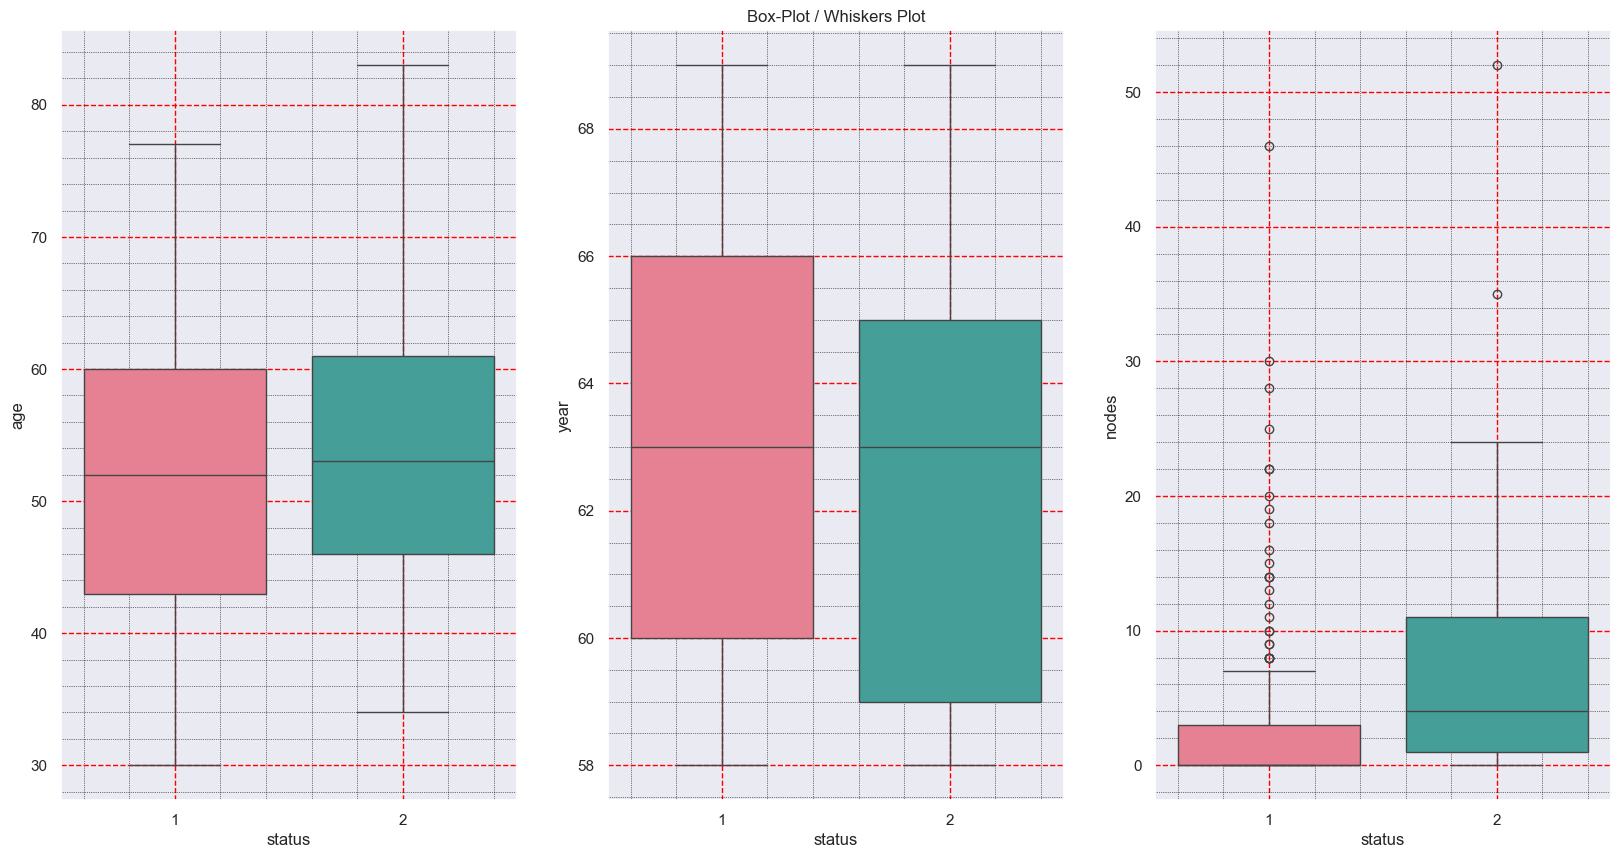

In [98]:
plt.close()
plt.figure(figsize=(20,10))
for index, columnY in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, index+1)
    sns.boxplot(x="status", y=columnY, data=df, palette='husl')
    plt.grid(visible=True, color='red',linestyle='--', linewidth=1)
     # Enable minor ticks
    plt.minorticks_on()

    # Get the current axes and set minor gridlines visible
    ax = plt.gca()  # Get the current axis
    ax.grid(which='minor', linestyle=':', color='black', linewidth=0.5)  # Set minor gridlines to black and dotted

    # Customize tick parameters for minor ticks
    plt.tick_params(axis='both', which='minor', length=4, width=1, colors='black')

plt.subplot(1, 3, 2)
plt.title("Box-Plot / Whiskers Plot")
plt.show()

### Observations:
- age 30-34 -> survived, age more than 76 -> died.
- operation took place in year 60-65 have higher chance of survival.
- nodes less then 3-> good chance of survival, nodes more than 10-> less chance of survival.

### Bivariate Analysis
- pairplot

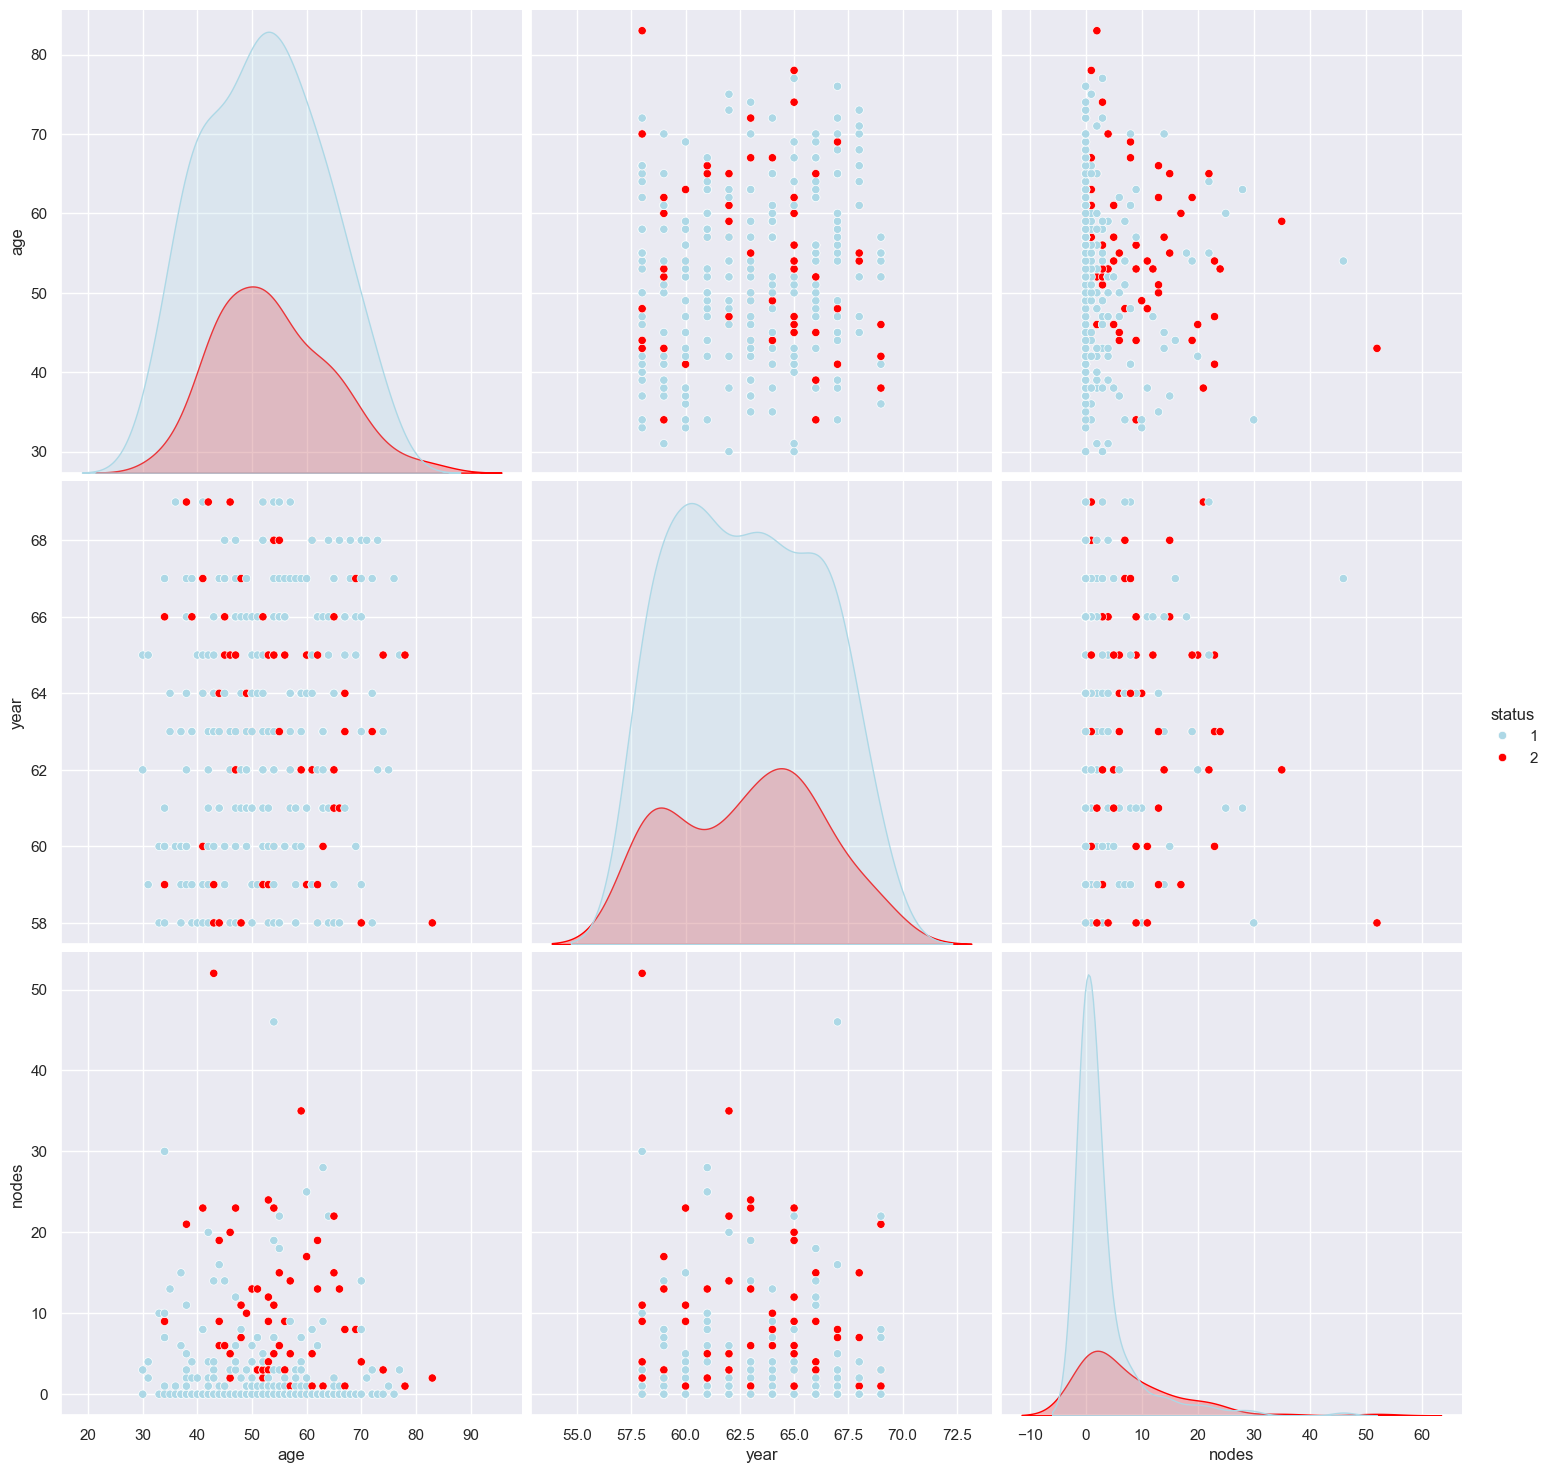

In [100]:
sns.pairplot(data=df, hue="status", height=5, palette={1:'lightblue', 2:'red'})
plt.grid()
plt.show()

### Observations:
- year of operation doesn't have an effect on the classification.
- age and nodes can be useful.

### Conclusion:
- data set is imbalanced.
- use age and nodes as features for classification.
- need advanced ML algo to reveal more.